# Stock Market Project

In [263]:
from pandas_datareader import data, wb
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

In [265]:
start = datetime(2006, 1, 1)
end = datetime(2016, 1, 1)

In [267]:
BAC = yf.download("BAC", start = start, end = end)

C = yf.download("C", start = start, end = end)

GS = yf.download("GS", start = start, end = end)

JPM = yf.download("JPM", start = start, end = end)

MS = yf.download("MS", start = start, end = end)

WFC = yf.download("WFC", start = start, end = end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [269]:
df = yf.download(["BAC", "C", "GS", "JPM", "MS", "WPC"])

[*********************100%***********************]  6 of 6 completed


In [270]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WPC']

In [273]:
Bankstock = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [275]:
Bankstock.columns = Bankstock.columns.droplevel(2)
Bankstock.columns.names = ['Bank Ticker', 'Stock Info']

In [277]:
Bankstock.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   31.173674  31.239887  30.557881  31.067728  16296700  321.442657   
2006-01-04   30.842602  31.279616  30.756523  31.120700  17757900  315.508148   
2006-01-05   30.882330  31.008139  30.670445  30.842603  14970700  317.073364   
2006-01-06   30.835985  31.061114  30.690313  30.988278  12599800  317.073364   
2006-01-09   30.855852  31.100847  30.696939  30.935311  15619400  315.573425   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   322.029585  313.747345  319.551439  1537600  ...  31.934679   
2006-01-04   320.203606  315.312512  318.638460  1870960  ...  31.956577   
2006-01-05   318.116782  315.638635  315.899490  1143160  ...  32.044216   
2006-01-06   318.899365  314.334343  318.768928  1370210  ...  32.077068   
2006-01-09   317.855936  314.986498  316.942936  1680740  ...  32.416634   

Bank Ticker                                                  WPC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   32.033260  31.074836  31.310333  5377000  18.675652  18.719560   
2006-01-04   32.465911  31.956577  32.148263  7977800  18.459040  18.628818   
2006-01-05   32.088031  31.775859  32.066123  5778000  18.438547  18.473673   
2006-01-06   32.230415  31.792279  32.186603  6889800  18.546856  18.602473   
2006-01-09   32.471402  32.104461  32.109939  4144500  18.543919  18.631736   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.262914  18.500019  11016400  
2006-01-04   18.362441  18.617109  10870000  
2006-01-05   18.330239  18.441474  10158000  
2006-01-06   18.374150  18.488311   8403800  
2006-01-09   18.473666  18.543919   5619600  

[5 rows x 30 columns]

# EDX

In [281]:
Bankstock.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     37.699589
C      383.228149
GS     185.153244
JPM     53.603722
MS      50.061142
WPC     44.026573
dtype: float64

In [283]:
returns = pd.DataFrame()

In [285]:
for tick in tickers:
    returns[tick+' Return'] = Bankstock[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WPC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005771,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012031,0.016241,0.010586,-0.000158


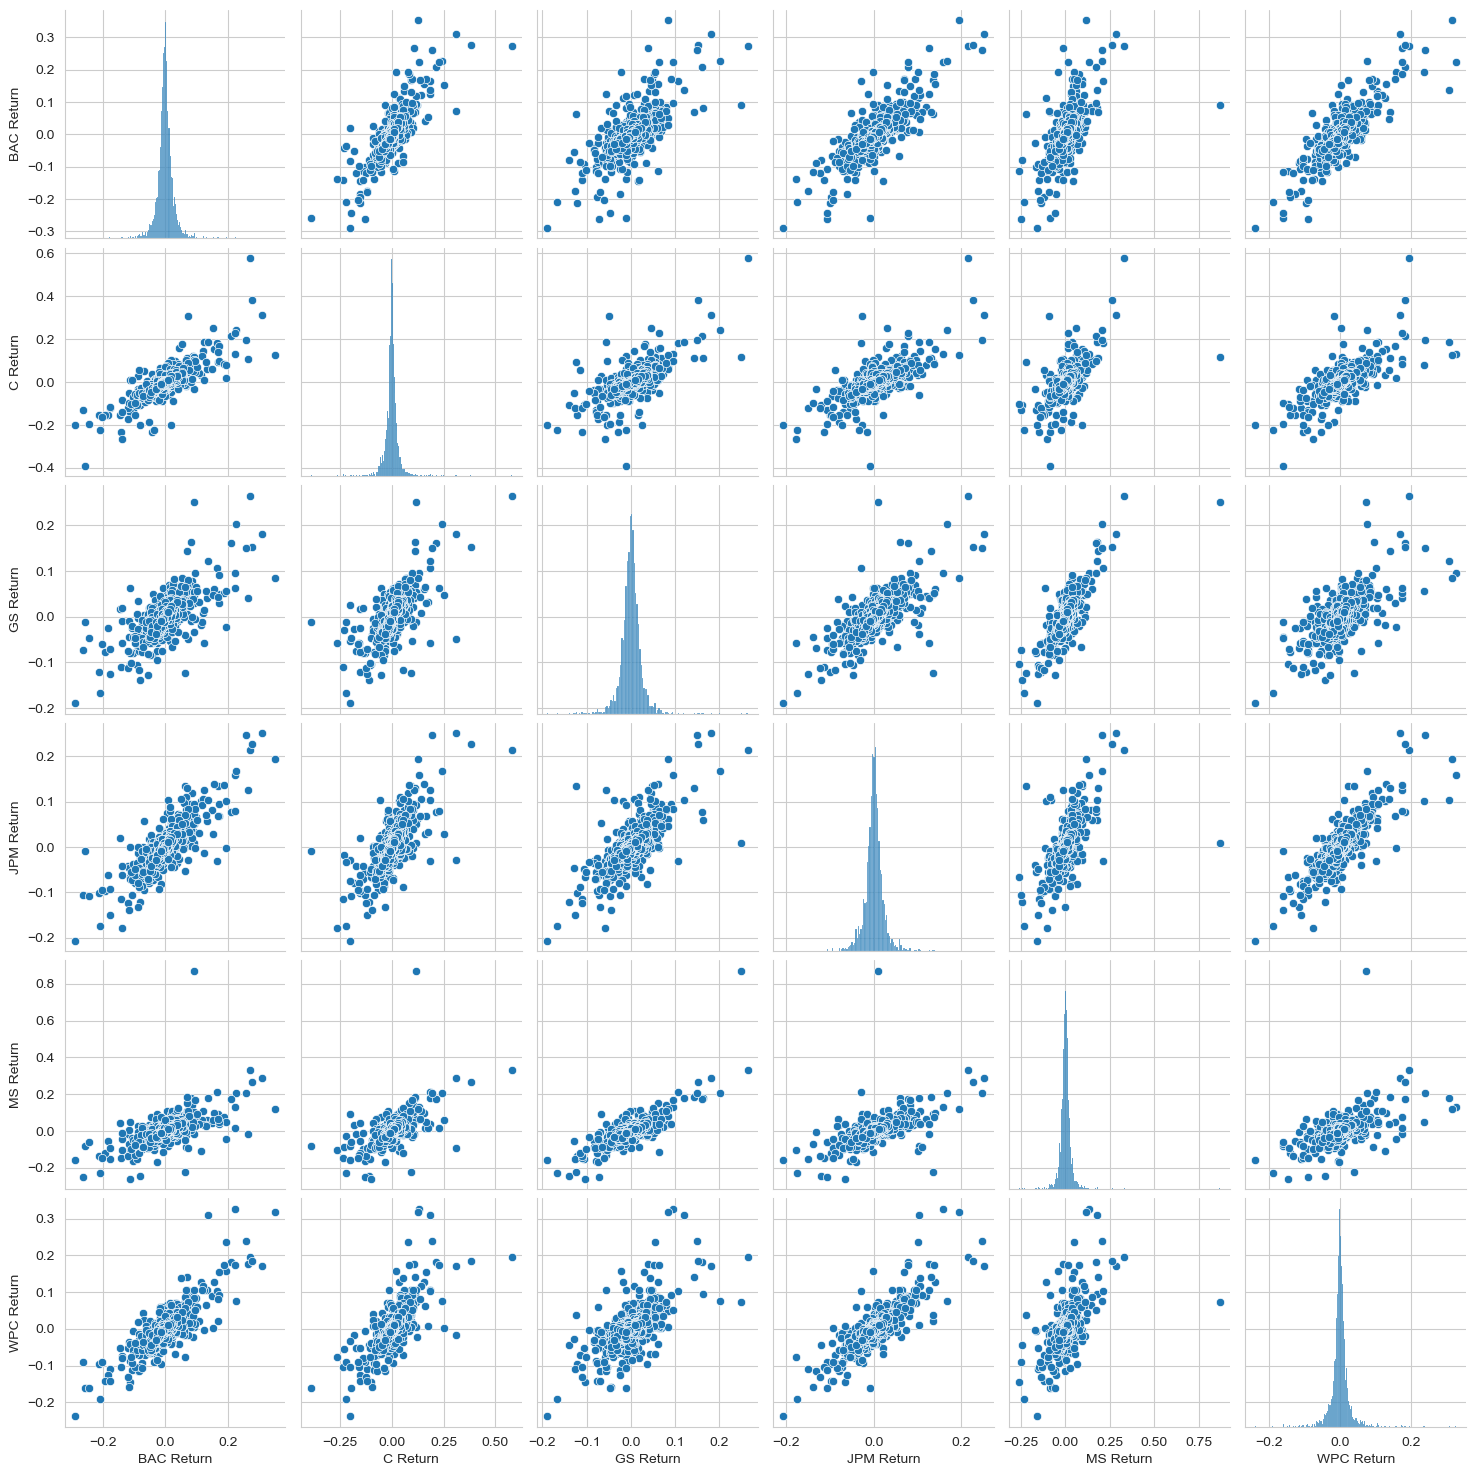

In [287]:
# Pairplot of returns data frame
sns.pairplot(returns)

In [289]:
returns.idxmin() # BAC, GS, JPM, WPC

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WPC Return   2009-01-20
dtype: datetime64[ns]

In [291]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WPC Return   2008-07-16
dtype: datetime64[ns]

In [293]:
returns.std()

BAC Return    0.036659
C Return      0.038672
GS Return     0.025386
JPM Return    0.027675
MS Return     0.037717
WPC Return    0.030195
dtype: float64

In [295]:
riskist = returns.loc['2015-01-01':'2015-12-31'].std()
riskist

BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WPC Return    0.012552
dtype: float64

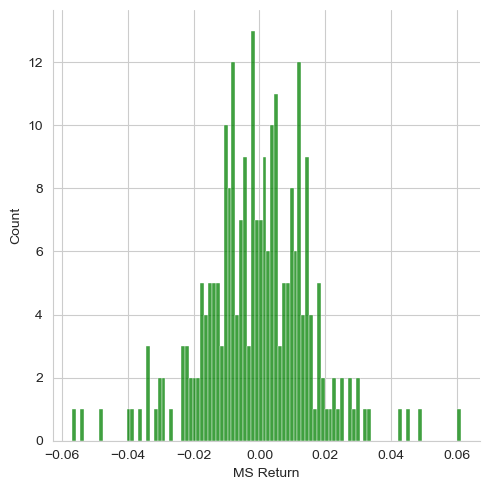

In [297]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins = 100, color = 'Green')

/var/folders/gl/njpwbr157rs7n9jgsg0zdnz80000gn/T/ipykernel_4073/3636621921.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='C Return', ylabel='Density'>

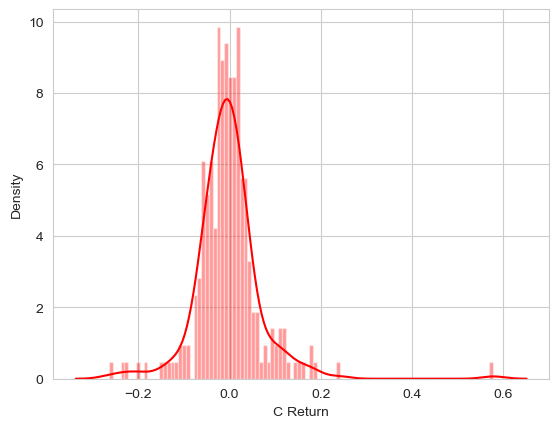

In [299]:
sns.distplot(returns.loc['2008-01-01': '2008-12-31']["C Return"], bins = 100, color = "red")

# More Visualization

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

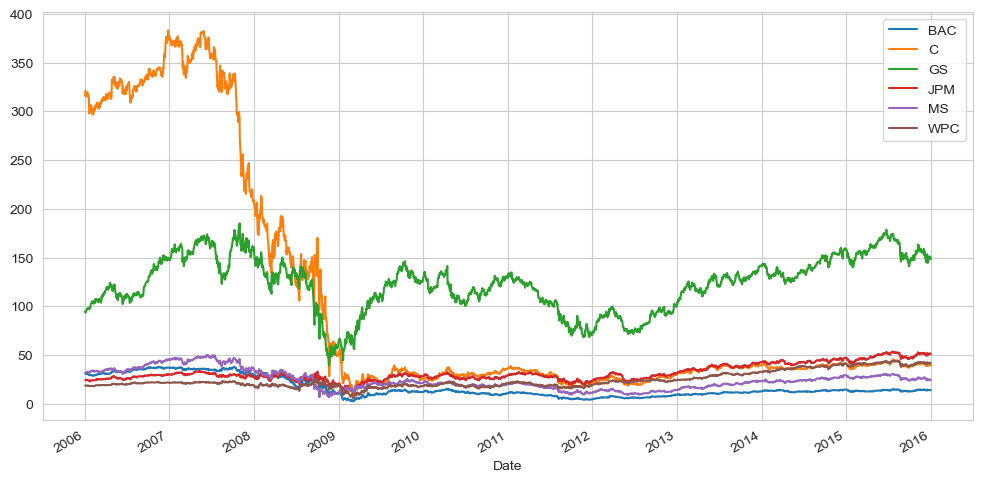

In [305]:
# Create a line plot showing Close price for each bank for the entire index of time. 
# (Hint: Try using a for loop, or use .xs to get a cross section of the data.)
for tick in tickers:
    Bankstock[tick]['Close'].plot(figsize = (12, 6), label = tick)
plt.plot()
plt.legend()

<Axes: xlabel='Date'>

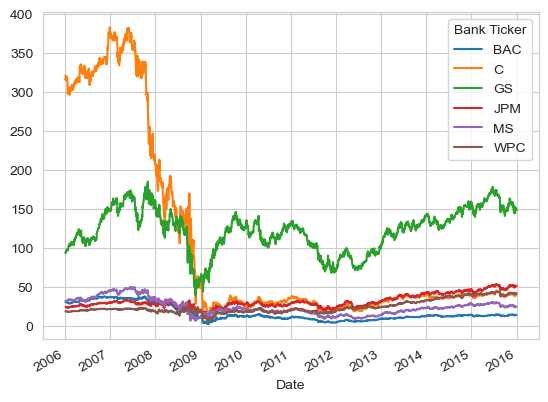

In [307]:
# I can also use xs/ cross section
Bankstock.xs(key = 'Close', axis = 1, level = 'Stock Info').plot()

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



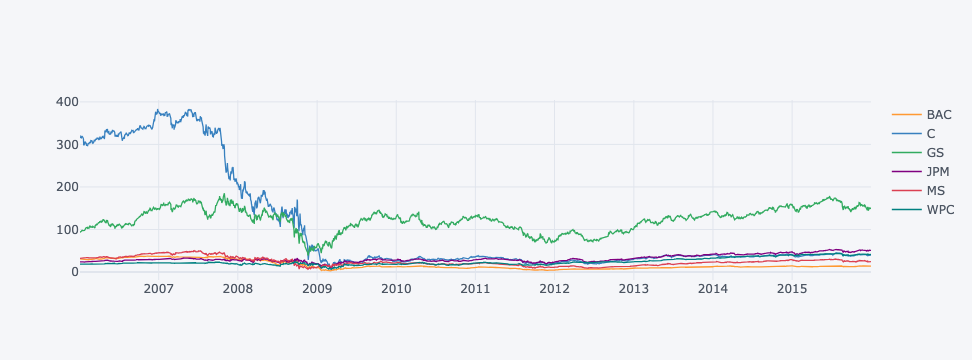

In [309]:
# Using Plotly
Bankstock.xs(key = 'Close', axis = 1, level = 'Stock Info').iplot()

# Averages

In [312]:
Bankstock.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   31.173674  31.239887  30.557881  31.067728  16296700  321.442657   
2006-01-04   30.842602  31.279616  30.756523  31.120700  17757900  315.508148   
2006-01-05   30.882330  31.008139  30.670445  30.842603  14970700  317.073364   
2006-01-06   30.835985  31.061114  30.690313  30.988278  12599800  317.073364   
2006-01-09   30.855852  31.100847  30.696939  30.935311  15619400  315.573425   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   322.029585  313.747345  319.551439  1537600  ...  31.934679   
2006-01-04   320.203606  315.312512  318.638460  1870960  ...  31.956577   
2006-01-05   318.116782  315.638635  315.899490  1143160  ...  32.044216   
2006-01-06   318.899365  314.334343  318.768928  1370210  ...  32.077068   
2006-01-09   317.855936  314.986498  316.942936  1680740  ...  32.416634   

Bank Ticker                                                  WPC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   32.033260  31.074836  31.310333  5377000  18.675652  18.719560   
2006-01-04   32.465911  31.956577  32.148263  7977800  18.459040  18.628818   
2006-01-05   32.088031  31.775859  32.066123  5778000  18.438547  18.473673   
2006-01-06   32.230415  31.792279  32.186603  6889800  18.546856  18.602473   
2006-01-09   32.471402  32.104461  32.109939  4144500  18.543919  18.631736   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.262914  18.500019  11016400  
2006-01-04   18.362441  18.617109  10870000  
2006-01-05   18.330239  18.441474  10158000  
2006-01-06   18.374150  18.488311   8403800  
2006-01-09   18.473666  18.543919   5619600  

[5 rows x 30 columns]

In [314]:
#  Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

<Figure size 1200x600 with 0 Axes>

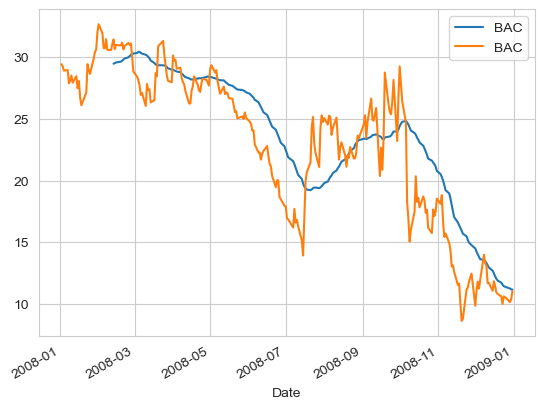

In [200]:
plt.figure(figsize = (12, 6))
ax = BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window = 30).mean().plot(label = '30 day avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'Close Price', ax= ax)
plt.legend()

In [ ]:
# Create a heatmap of the correlation between the stocks Close Price.

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

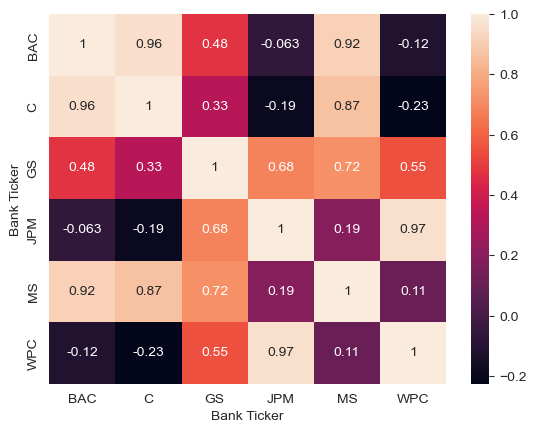

In [211]:
sns.heatmap(Bankstock.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)

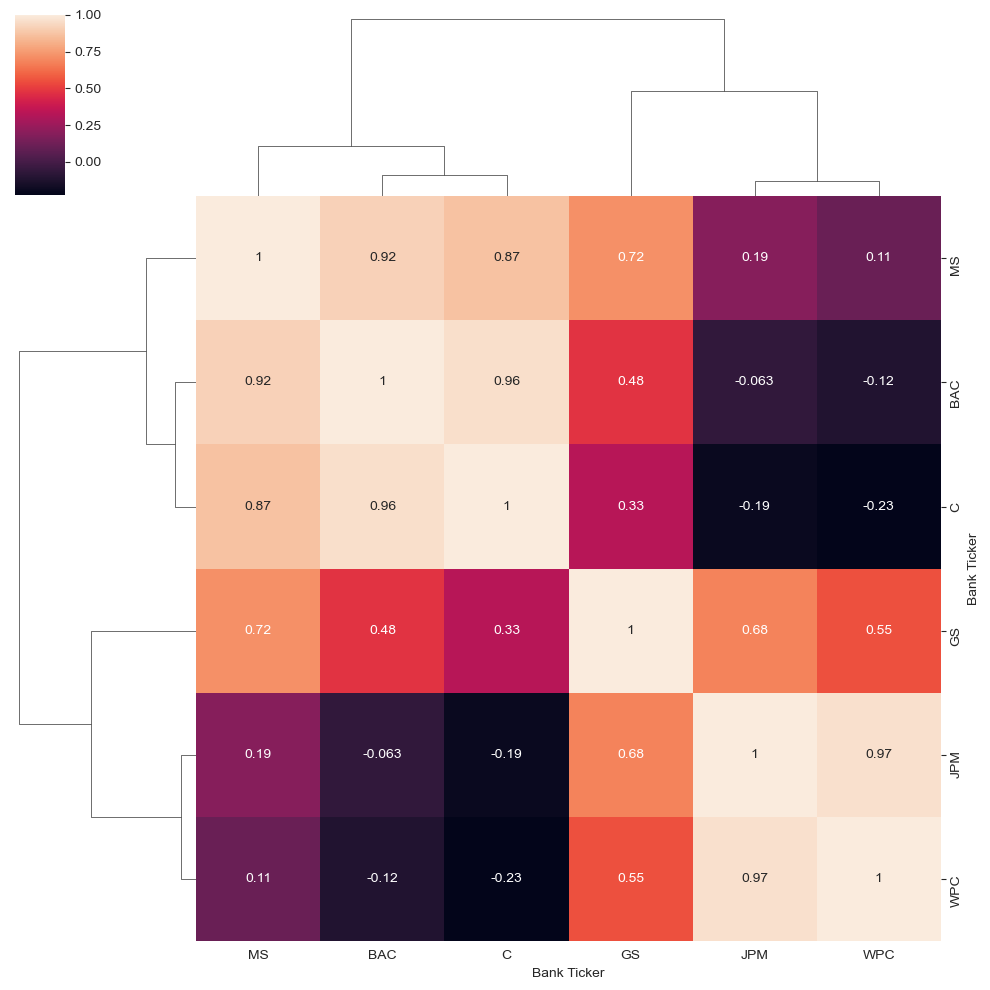

In [216]:
sns.clustermap(Bankstock.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)

In [232]:
# Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

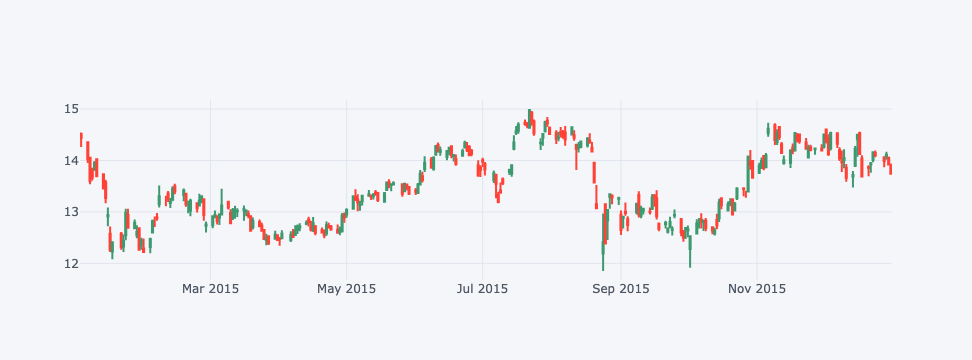

In [243]:
bac15 = Bankstock['BAC'][['Open', "Close", "Low", "High"]].loc['2015-01-01':'2016-01-01'].iplot(kind = 'candle')

In [248]:
# Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



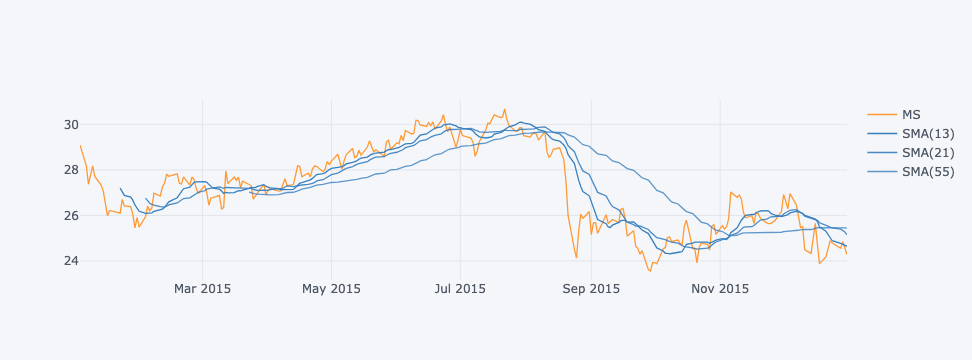

In [251]:
MS["Close"].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods = [13, 21, 55])

In [254]:
# Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



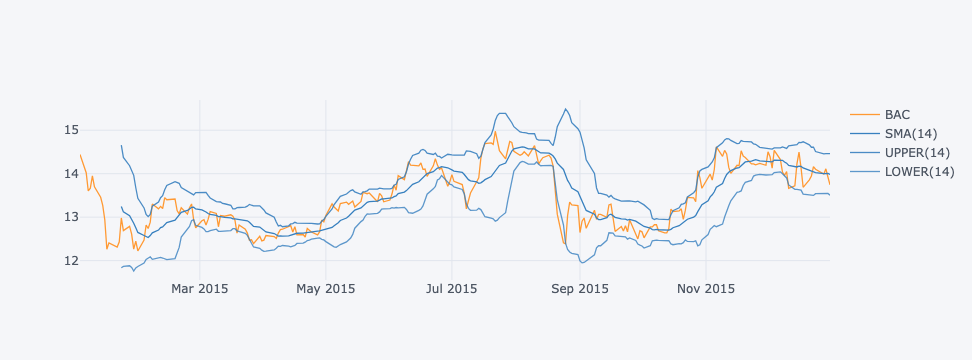

In [257]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')